In [122]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

#from skbio.stats.composition import clr
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

def color_big_red(val):
    color = 'red' if abs(val) >0.4 else 'black'
    return 'color: %s' % color

## Data 

In [123]:
data = pd.read_excel(r'C:\Users\boai-\Desktop\UnumAI\Colorado analysis\2020_CO_Terms_cleaned_1117.xlsx')

In [124]:
data.shape

(7724, 256)

In [125]:
data.head()

,Unnamed: 0,Terms,category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,...,2019-10-16 00:00:00,2019-10-17 00:00:00,2019-10-18 00:00:00,2019-10-19 00:00:00,2019-10-20 00:00:00,2019-10-21 00:00:00,2019-10-22 00:00:00,2019-10-23 00:00:00,2019-10-24 00:00:00,2019-10-25 00:00:00
0,0,farmers market,Agriculture,0.000024,0.000041,0.000017,0.000016,0.000020,0.000035,0.000024,...,0.000014,0.000015,0.000026,0.000049,0.000063,0.000025,0.000010,0.000021,0.000039,0.000014
1,1,colorado land,Environmental,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000014,NaN,0.000016,NaN,NaN,NaN,NaN,0.000012,0.000012,NaN
2,2,land,Environmental,0.000464,0.000575,0.000430,0.000612,0.000455,0.000544,0.000678,...,0.000522,0.000629,0.000512,0.000730,0.000673,0.000667,0.000604,0.000609,0.000590,0.000476
3,3,lands,Environmental,0.000063,0.000052,0.000079,0.000058,0.000048,0.000043,0.000064,...,0.000042,0.000069,0.000079,0.000065,0.000077,0.000057,0.000079,0.000070,0.000043,0.000059
4,4,lands day,Environmental,NaN,NaN,0.000023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
data[['category', 'Terms']].groupby('category').count()

,Terms
category,
Agriculture,52
Campaign Finance,45
Congress,274
Conspiracy,39
Corporate Regulation,45
Criminal Justice,314
Cybersecurity,21
Economy,1218
Education,283


In [127]:
# Setting up variables for each category.
# Not used but may be helpful
conspiracy = data[data['category'].isin(['Conspiracy', 'Mueller/Russia'])]
corpreg_econ = data[data['category'].isin(['Corporate Regulation','Economy'])]
crime = data[data['category'].isin(['Criminal Justice', 'Public Safety', 'Guns'])]
Health= data[data['category'].isin([ 'Healthcare'])]
education = data[data['category'].isin(['Education'])]
electability = data[data['category'].isin(['Electability'])]
environment = data[data['category'].isin(['Environmental'])]
ethics = data[data['category'].isin(['Ethics/Morals'])]
immigration = data[data['category'].isin(['Immigration'])]
impeachment = data[data['category'].isin(['Impeachment'])]
law_gov = data[data['category'].isin(['Campaign Finance', 'Judiciary Branch', 'Generic Policy Queries', 'Voter Turnout', 'Election Security', 'Congress', 'Cybersecurity'])]
media = data[data['category'].isin(['Media'])]
religion = data[data['category'].isin(['Religion'])]
rephealth = data[data['category'].isin(['Reproductive Health'])]
soceq = data[data['category'].isin(['Social Equality'])]
taxes = data[data['category'].isin(['Taxes/Spending'])]
trade_ag = data[data['category'].isin(['Trade', 'Agriculture'])]
war = data[data['category'].isin(['War'])]

In [128]:
data.head()

,Unnamed: 0,Terms,category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,...,2019-10-16 00:00:00,2019-10-17 00:00:00,2019-10-18 00:00:00,2019-10-19 00:00:00,2019-10-20 00:00:00,2019-10-21 00:00:00,2019-10-22 00:00:00,2019-10-23 00:00:00,2019-10-24 00:00:00,2019-10-25 00:00:00
0,0,farmers market,Agriculture,0.000024,0.000041,0.000017,0.000016,0.000020,0.000035,0.000024,...,0.000014,0.000015,0.000026,0.000049,0.000063,0.000025,0.000010,0.000021,0.000039,0.000014
1,1,colorado land,Environmental,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000014,NaN,0.000016,NaN,NaN,NaN,NaN,0.000012,0.000012,NaN
2,2,land,Environmental,0.000464,0.000575,0.000430,0.000612,0.000455,0.000544,0.000678,...,0.000522,0.000629,0.000512,0.000730,0.000673,0.000667,0.000604,0.000609,0.000590,0.000476
3,3,lands,Environmental,0.000063,0.000052,0.000079,0.000058,0.000048,0.000043,0.000064,...,0.000042,0.000069,0.000079,0.000065,0.000077,0.000057,0.000079,0.000070,0.000043,0.000059
4,4,lands day,Environmental,NaN,NaN,0.000023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# PCA
#### Run if PCA has not already been done

In [129]:
df = data.drop(columns={"Terms"}).fillna(0).groupby('category').mean().T
df.drop(columns={'Space','Impeachment','State/Local'},inplace=True)


In [130]:
df.head()

category,Agriculture,Campaign Finance,Congress,Conspiracy,Corporate Regulation,Criminal Justice,Cybersecurity,Economy,Education,Electability,...,Mueller/Russia,National Security,Public Safety,Religion,Reproductive Health,Social Equality,Taxes/Spending,Trade,Veterans,Voter Turnout
Unnamed: 0,272.307692,1463.422222,600.609489,1131.230769,689.466667,1185.786624,1092.857143,1559.755337,2271.925795,2632.877311,...,4463.678571,4939.934874,4995.083151,5588.607143,5528.230769,5611.690440,5306.384615,6642.573770,6329.728814,4702.483871
2019-02-15 00:00:00,0.000036,0.000021,0.000154,0.000042,0.000151,0.000224,0.000014,0.000127,0.000102,0.000121,...,0.000080,0.000269,0.000177,0.000058,0.000085,0.000087,0.000361,0.000056,0.000146,0.000082
2019-02-16 00:00:00,0.000040,0.000018,0.000122,0.000043,0.000124,0.000230,0.000014,0.000122,0.000098,0.000121,...,0.000100,0.000275,0.000195,0.000073,0.000105,0.000086,0.000274,0.000058,0.000148,0.000048
2019-02-17 00:00:00,0.000042,0.000024,0.000136,0.000051,0.000111,0.000262,0.000013,0.000125,0.000106,0.000124,...,0.000099,0.000227,0.000193,0.000093,0.000111,0.000098,0.000228,0.000052,0.000155,0.000044
2019-02-18 00:00:00,0.000040,0.000021,0.000125,0.000041,0.000153,0.000224,0.000015,0.000133,0.000114,0.000131,...,0.000093,0.000213,0.000179,0.000070,0.000115,0.000099,0.000242,0.000057,0.000185,0.000039


In [131]:
df['tot'] = df.sum(axis=1)
for i in df.columns:
    df[i] = df[i] / df.tot
df.drop(columns={'tot'},inplace=True)

In [132]:
fa = FactorAnalyzer(n_factors=14, rotation='varimax')
fa.fit(df)

factors = pd.DataFrame(fa.loadings_, index=list(df.columns)).style.applymap(color_big_red)
factors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Agriculture,0.741818,-0.0580824,-0.0233421,0.067374,-0.0298637,-0.0390425,0.0531177,0.0186206,-0.149851,0.0481852,0.1722,-0.101259,-0.0980462,0.0168697
Campaign Finance,-0.00728891,0.696205,-0.00874642,0.119642,-0.0297261,0.0484245,-0.02655,-0.0658169,0.117512,0.151966,0.0446116,0.116225,-0.0268039,-0.0833528
Congress,-0.188893,0.0535155,0.191514,0.887445,-0.0831692,0.099228,-0.0717986,-0.0765111,-0.0234593,0.0760853,0.120499,-0.00324534,-0.0634743,0.105372
Conspiracy,0.230975,0.201372,-0.0120737,0.154574,0.00505517,0.0575904,-0.0622473,-0.0404855,0.0840961,0.585855,0.0431358,-0.0195061,0.0125036,0.00707566
Corporate Regulation,0.0649741,-0.14686,0.736338,-0.00847653,-0.0435044,0.0423927,-0.0683753,-0.0390241,0.14204,0.0181238,0.0578328,0.0707158,-0.0627309,-0.0726847
Criminal Justice,0.739038,-0.241129,0.147487,0.0505061,-0.0414148,0.113826,-0.12631,-0.142879,-0.10785,0.402382,0.0713557,0.0308471,-0.106562,0.158233
Cybersecurity,-0.0665648,0.483724,0.330323,0.0323512,-0.0338098,-2.54927e-05,-0.0406933,-0.0162563,-0.0486217,-0.176162,-0.0958034,-0.0467527,0.00721585,0.086661
Economy,0.311695,-0.0152184,0.874459,0.0732171,0.0139881,0.108355,-0.00273516,-0.00168829,0.10955,0.148855,0.112353,0.0250166,-0.0151532,-0.0485554
Education,0.129962,0.264047,0.400076,0.0872669,-0.225816,-0.0014325,0.349167,-0.0327713,-0.00486576,0.114705,0.635633,-0.0405192,-0.0611092,-0.0362143
Electability,0.189396,0.242097,-0.130507,0.706035,-0.0293488,-0.00279571,-0.0797281,-0.0288807,0.0961128,0.143527,-0.0676124,0.0215064,0.0200994,-0.148649


In [133]:
fa.get_factor_variance()

(array([4.55910897, 4.10022384, 3.80359186, 2.17944591, 1.2715347 ,
        1.20588968, 1.19377189, 1.14488924, 0.91252469, 0.84680769,
        0.7529026 , 0.49940678, 0.35726058, 0.3323653 ]),
 array([0.1519703 , 0.13667413, 0.1267864 , 0.0726482 , 0.04238449,
        0.04019632, 0.0397924 , 0.03816297, 0.03041749, 0.02822692,
        0.02509675, 0.01664689, 0.01190869, 0.01107884]),
 array([0.1519703 , 0.28864443, 0.41543082, 0.48807902, 0.53046351,
        0.57065983, 0.61045223, 0.6486152 , 0.67903269, 0.70725962,
        0.73235637, 0.74900326, 0.76091195, 0.77199079]))

## Map data to PCA Categories and include dependents

In [134]:
# PCA category Mappings and Dependent variable files
pca_cats = pd.read_excel('2020 Dems Category Ungroup Mapping .xlsx')
dependents = pd.read_excel('2020 Dependent.xlsx')

In [135]:
dependents = dependents.rename(columns = {'Unnamed: 0':'Date'})

In [136]:
dependents.head()

,Date,Hickenlooper_raw,Gardner_raw,Hickenlooper_adj,Gardner_adj
0,2019-02-15,0.431907,0.568093,0.474177,0.525823
1,2019-02-16,0.431490,0.568510,0.474032,0.525968
2,2019-02-17,0.430931,0.569069,0.473836,0.526164
3,2019-02-18,0.430737,0.569263,0.473768,0.526232
4,2019-02-19,0.432308,0.567692,0.474318,0.525682


In [137]:
pca_cats.columns

Index(['category', 'Component'], dtype='object')

In [138]:
reg_df = pd.merge(data,pca_cats,on='category',how='left').drop(["Terms"],axis = 1).groupby('Component').sum().T
reg_df = reg_df.drop('Unnamed: 0', axis = 0)
reg_df = reg_df.reset_index().rename(columns={'index':'Date'})
reg_df['Date'] = pd.to_datetime(reg_df['Date'], infer_datetime_format=True)
reg_df = pd.merge(reg_df,dependents,on='Date',how='inner')
reg_df = reg_df.fillna(0)

In [139]:
# reg_df will be the clean dataframe used for modeling
reg_df.head()

,Date,Agriculture,Campaign Finance,Congress,Conspiracy,Corporate Regulation,Criminal Justice,Cybersecurity,Economy,Education,...,Reproductive Health,Social Equality,Taxes/Spending,Trade,Veterans,Voter Turnout,Hickenlooper_raw,Gardner_raw,Hickenlooper_adj,Gardner_adj
0,2019-02-15,0.001875,0.000937,0.042161,0.001623,0.006792,0.070359,0.000295,0.154833,0.028909,...,0.006596,0.057121,0.028161,0.003396,0.008633,0.002532,0.431907,0.568093,0.474177,0.525823
1,2019-02-16,0.002079,0.000790,0.033425,0.001665,0.005574,0.072226,0.000301,0.149019,0.027726,...,0.008201,0.056612,0.021364,0.003539,0.008733,0.001477,0.431490,0.568510,0.474032,0.525968
2,2019-02-17,0.002176,0.001086,0.037380,0.001973,0.005004,0.082171,0.000277,0.152783,0.030003,...,0.008683,0.064394,0.017770,0.003165,0.009119,0.001355,0.430931,0.569069,0.473836,0.526164
3,2019-02-18,0.002070,0.000925,0.034281,0.001610,0.006867,0.070318,0.000313,0.162143,0.032236,...,0.008950,0.065086,0.018913,0.003488,0.010905,0.001218,0.430737,0.569263,0.473768,0.526232
4,2019-02-19,0.002420,0.001152,0.037965,0.002056,0.006470,0.070640,0.000281,0.167030,0.034730,...,0.008098,0.063360,0.017258,0.003234,0.010208,0.001665,0.432308,0.567692,0.474318,0.525682


In [140]:
reg_df.columns

Index(['Date', 'Agriculture', 'Campaign Finance', 'Congress', 'Conspiracy',
       'Corporate Regulation', 'Criminal Justice', 'Cybersecurity', 'Economy',
       'Education', 'Electability', 'Election Security', 'Environmental',
       'Ethics/Morals', 'Generic Policy Queries', 'Guns', 'Healthcare',
       'Immigration', 'Impeachment', 'International Relations',
       'Judiciary Branch', 'Media', 'Mueller/Russia', 'National Security',
       'Public Safety', 'Religion', 'Reproductive Health', 'Social Equality',
       'Taxes/Spending', 'Trade', 'Veterans', 'Voter Turnout',
       'Hickenlooper_raw', 'Gardner_raw', 'Hickenlooper_adj', 'Gardner_adj'],
      dtype='object')

# Line plots for each variable
#### Identify spikes and unusual behavior

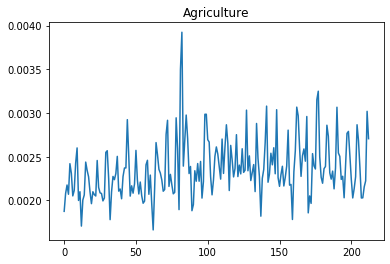

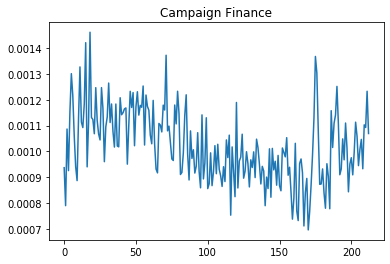

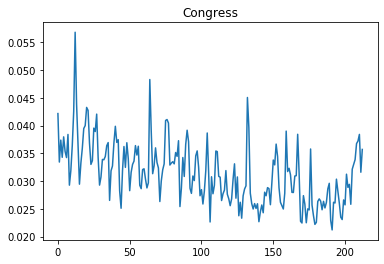

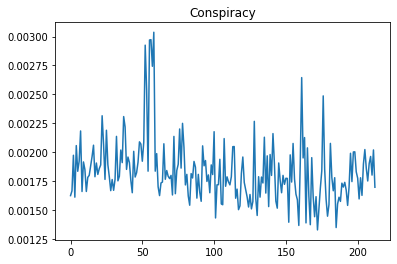

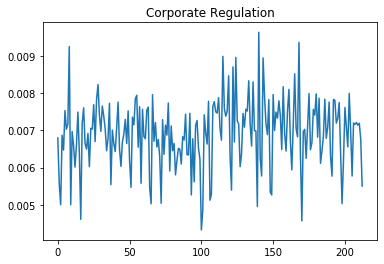

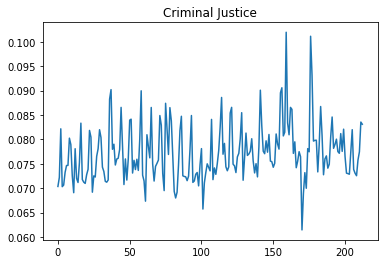

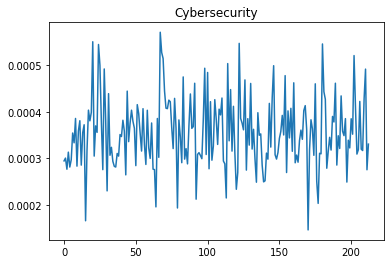

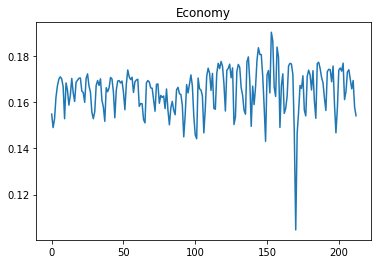

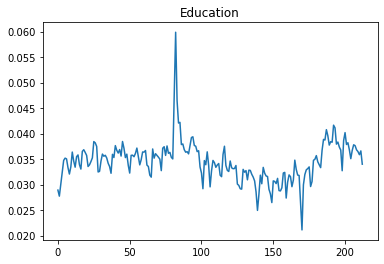

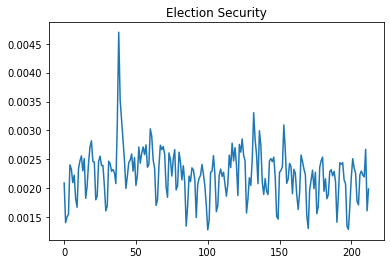

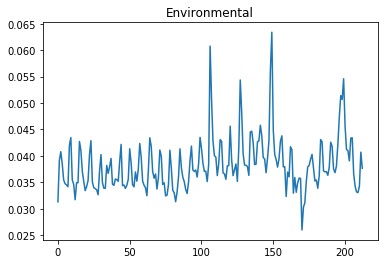

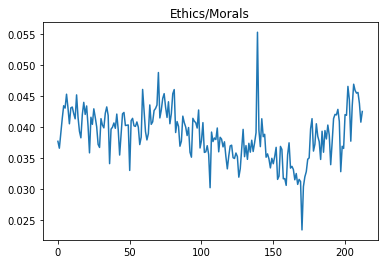

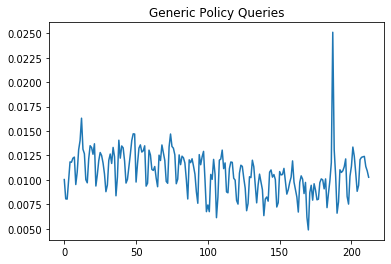

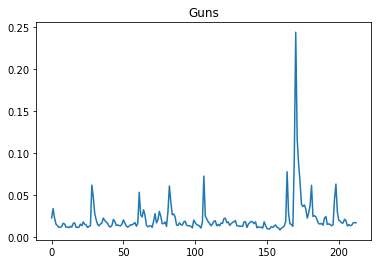

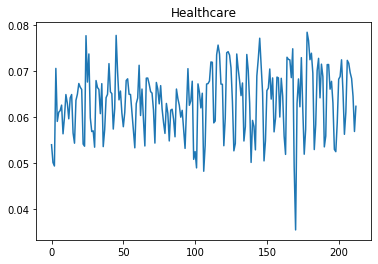

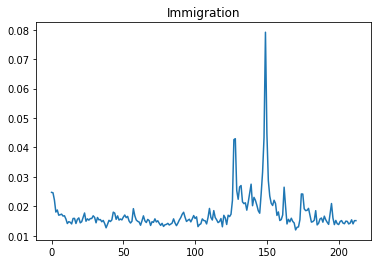

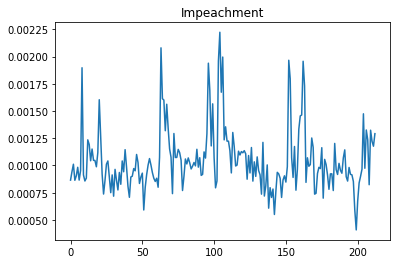

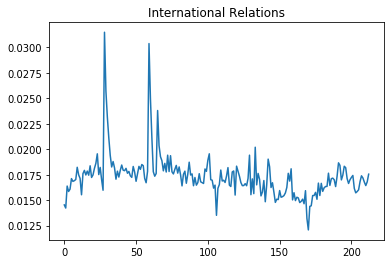

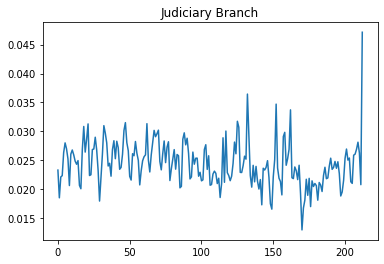

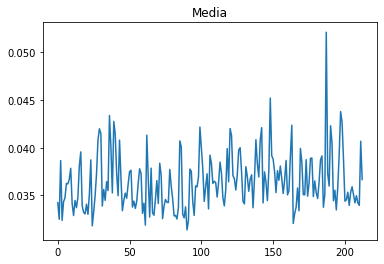

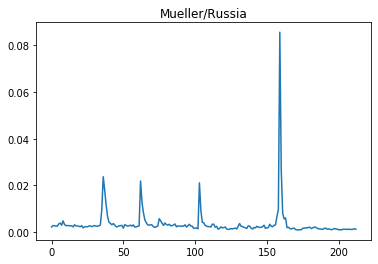

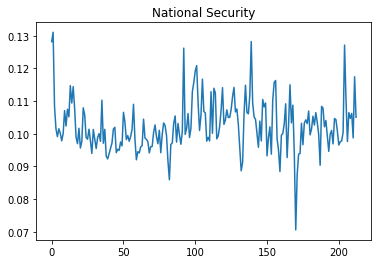

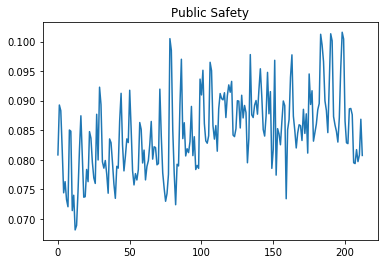

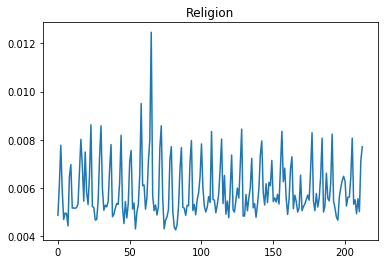

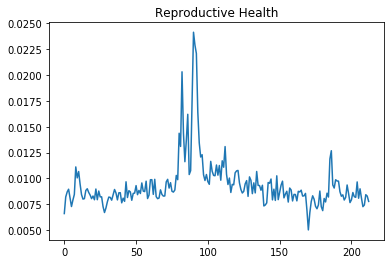

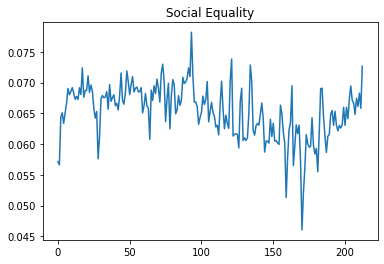

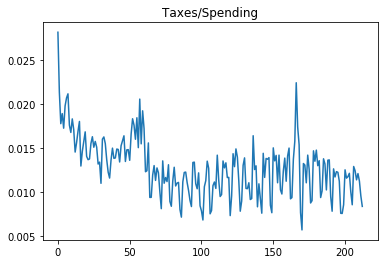

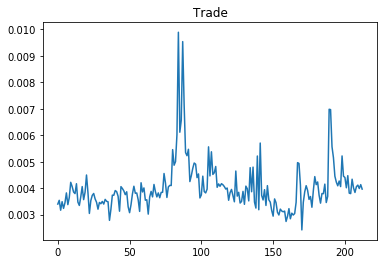

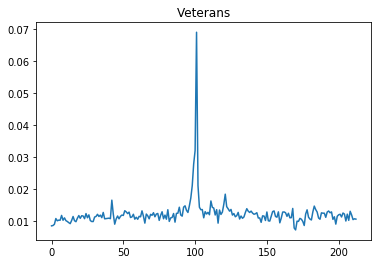

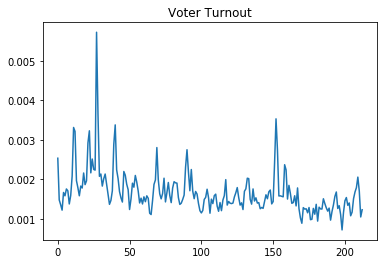

In [141]:
#Original data, no roll
reg_df_date = reg_df.drop(['Date','Hickenlooper_raw','Hickenlooper_adj' ,'Gardner_raw','Gardner_adj','Electability'], axis = 1)
reg_cols = reg_df_date.columns
for i in reg_cols: 
    plt.plot(reg_df_date[i])
    plt.title(i)
    plt.show()

# Histograms
#### Distribution of each variable

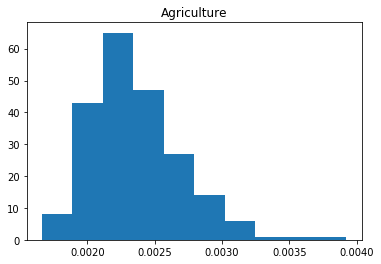

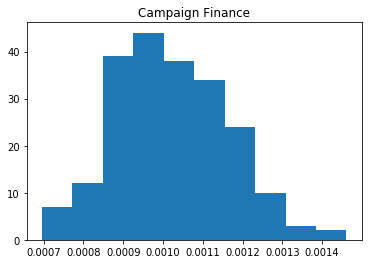

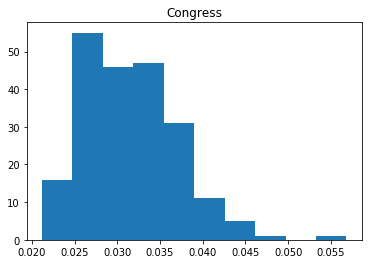

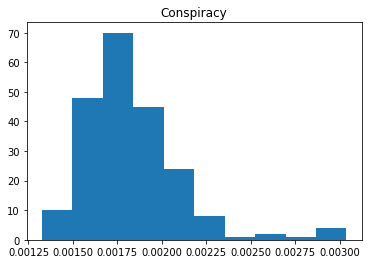

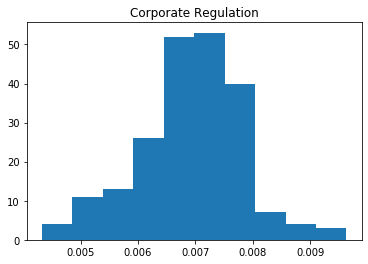

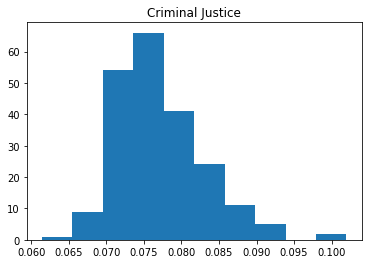

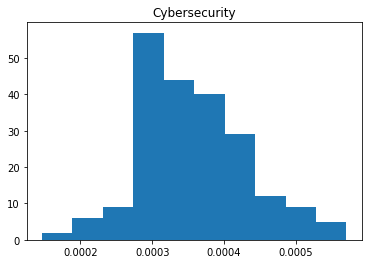

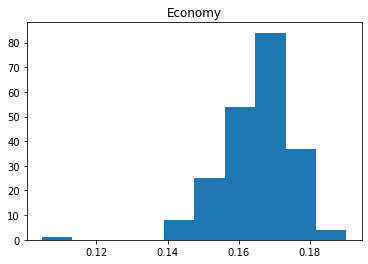

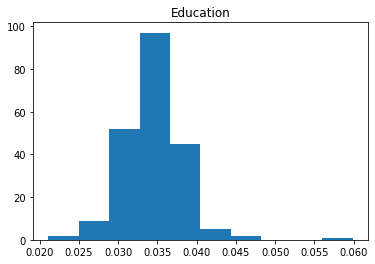

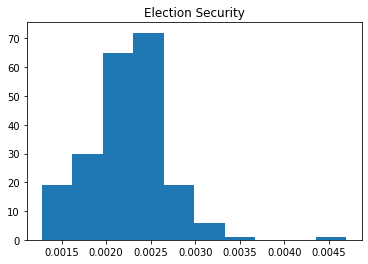

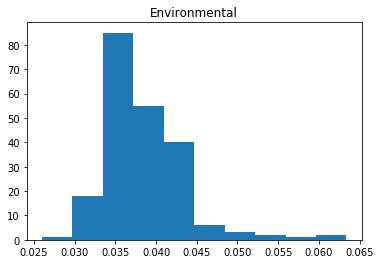

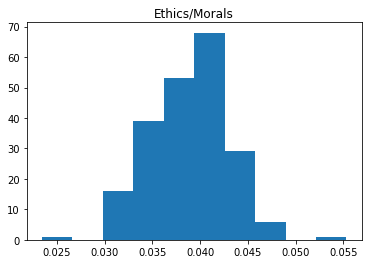

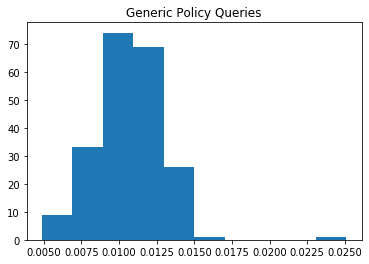

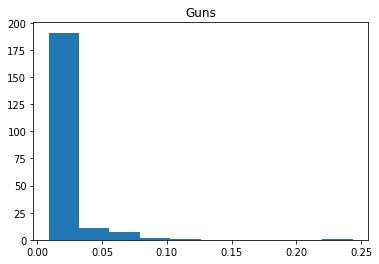

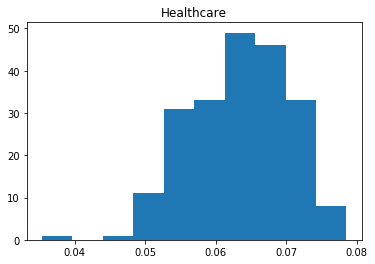

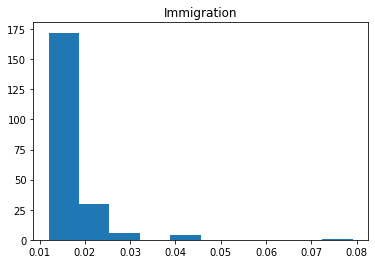

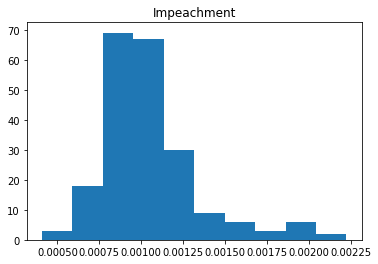

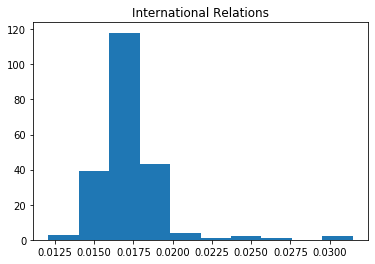

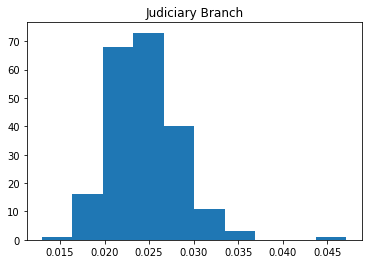

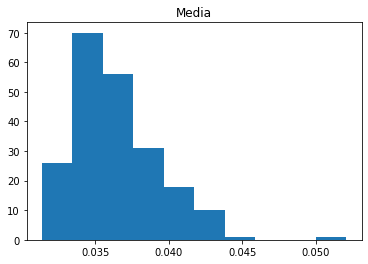

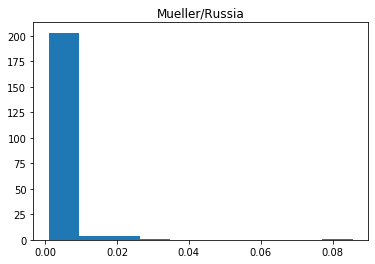

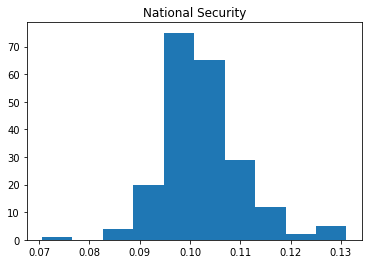

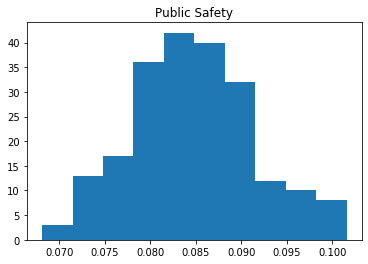

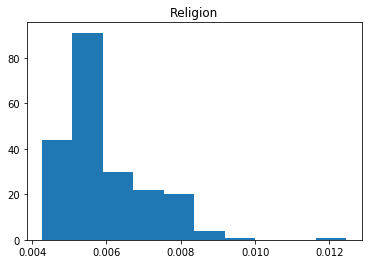

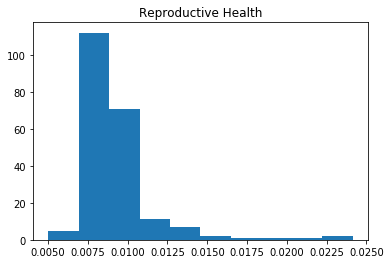

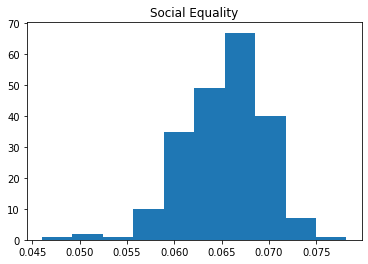

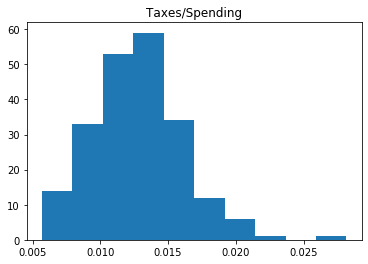

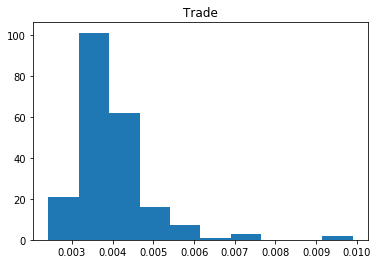

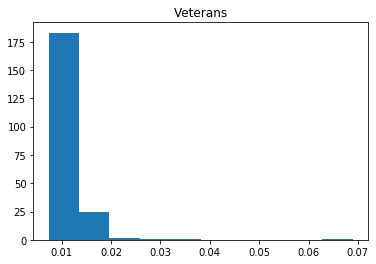

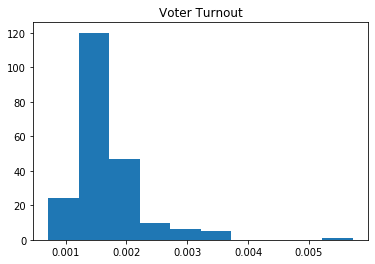

In [142]:
for i in reg_cols:
    plt.hist(reg_df_date[i])
    plt.title(i)
    plt.show()

# Rolling data
#### Use if you want to take a rolling average of the data

### rolling number give you a more steady average in Terms of weekly 

In [143]:
roll_7 = reg_df.set_index(['Date'])
roll_7 = roll_7.rolling(7).mean()
roll_7 = roll_7.dropna()
roll_7 = roll_7.reset_index()
roll_7.head()

,Date,Agriculture,Campaign Finance,Congress,Conspiracy,Corporate Regulation,Criminal Justice,Cybersecurity,Economy,Education,...,Reproductive Health,Social Equality,Taxes/Spending,Trade,Veterans,Voter Turnout,Hickenlooper_raw,Gardner_raw,Hickenlooper_adj,Gardner_adj
0,2019-02-21,0.002140,0.001058,0.036397,0.001812,0.006466,0.073372,0.000303,0.160967,0.031974,...,0.007958,0.062614,0.020565,0.003441,0.009771,0.001655,0.431458,0.568542,0.474020,0.525980
1,2019-02-22,0.002174,0.001076,0.035860,0.001892,0.006519,0.073989,0.000308,0.163150,0.032606,...,0.008222,0.064317,0.019565,0.003438,0.010236,0.001537,0.431255,0.568745,0.473949,0.526051
2,2019-02-23,0.002224,0.001098,0.035265,0.001891,0.007044,0.075136,0.000320,0.165675,0.033225,...,0.008637,0.065947,0.019027,0.003454,0.010471,0.001522,0.431139,0.568861,0.473909,0.526091
3,2019-02-24,0.002285,0.001069,0.034480,0.001883,0.007044,0.074676,0.000321,0.165686,0.033721,...,0.008831,0.066538,0.018885,0.003605,0.010757,0.001556,0.431176,0.568824,0.473922,0.526078
4,2019-02-25,0.002275,0.001098,0.034784,0.001917,0.007058,0.074993,0.000328,0.166572,0.034312,...,0.009076,0.067122,0.018800,0.003686,0.010665,0.001679,0.431262,0.568738,0.473952,0.526048


## Line plots for each variable after rolling data 
## Identify spikes and unusual behavior after rolling data 

In [144]:
roll_plot = roll_7.drop(['Date','Hickenlooper_raw','Hickenlooper_adj' ,'Gardner_raw','Gardner_adj','Electability'], axis = 1)
roll_plot_cols = roll_plot.columns


In [145]:
roll_plot_cols

Index(['Agriculture', 'Campaign Finance', 'Congress', 'Conspiracy',
       'Corporate Regulation', 'Criminal Justice', 'Cybersecurity', 'Economy',
       'Education', 'Election Security', 'Environmental', 'Ethics/Morals',
       'Generic Policy Queries', 'Guns', 'Healthcare', 'Immigration',
       'Impeachment', 'International Relations', 'Judiciary Branch', 'Media',
       'Mueller/Russia', 'National Security', 'Public Safety', 'Religion',
       'Reproductive Health', 'Social Equality', 'Taxes/Spending', 'Trade',
       'Veterans', 'Voter Turnout'],
      dtype='object')

# Rolling Train/Test and data exploration
#### Replace X variables dataframe with non rolled version if necessary

In [146]:
# if not rolling data, rename this variable and replace throughout 
# x = reg_df.drop(...)
x_7 = roll_7.drop(columns={'Date','Hickenlooper_raw','Hickenlooper_adj' ,'Gardner_raw','Gardner_adj','Electability'})

Hickenlooper_adj = roll_7['Hickenlooper_adj']
Gardner_adj = roll_7['Gardner_adj']



x_train_Hickenlooper_adj, x_test_Hickenlooper_adj, y_train_Hickenlooper_adj, y_test_Hickenlooper_adj = train_test_split(x_7, Hickenlooper_adj, test_size=0.3, random_state=42)
x_train_Gardner_adj, x_test_Gardner_adj, y_train_Gardner_adj, y_test_Gardner_adj = train_test_split(x_7, Gardner_adj, test_size=0.3, random_state=42)

### Train Test random split

In [147]:
#Hickenlooper_adj
reg_Hickenlooper_adj = LinearRegression().fit(x_train_Hickenlooper_adj, y_train_Hickenlooper_adj)
pred_train_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_train_Hickenlooper_adj)
pred_test_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_test_Hickenlooper_adj)
print('Hickenlooper_adj:: Train:', round(r2_score(y_train_Hickenlooper_adj,pred_train_Hickenlooper_adj),3),' Test:', round(r2_score(y_test_Hickenlooper_adj,pred_test_Hickenlooper_adj),3))

#Gardner_adj
reg_Gardner_adj = LinearRegression().fit(x_train_Gardner_adj, y_train_Gardner_adj)
pred_train_Gardner_adj = reg_Gardner_adj.predict(x_train_Gardner_adj)
pred_test_Gardner_adj = reg_Gardner_adj.predict(x_test_Gardner_adj)
print('Gardner_adj:: Train:', round(r2_score(y_train_Gardner_adj,pred_train_Gardner_adj),3),' Test:', round(r2_score(y_test_Gardner_adj,pred_test_Gardner_adj),3))



Hickenlooper_adj:: Train: 0.931  Test: 0.821
Gardner_adj:: Train: 0.931  Test: 0.821


### Train Test chronological split

In [148]:
Hickenlooper_adj_train = roll_7['Hickenlooper_adj'][:200]
Gardner_adj_train = roll_7['Gardner_adj'][:200]

Hickenlooper_adj_test = roll_7['Hickenlooper_adj'][200:]
Gardner_adj_test = roll_7['Gardner_adj'][200:]

x_7_train = x_7[:200]
x_7_test = x_7[200:]

In [149]:
x_7_test.describe()

,Agriculture,Campaign Finance,Congress,Conspiracy,Corporate Regulation,Criminal Justice,Cybersecurity,Economy,Education,Election Security,...,Mueller/Russia,National Security,Public Safety,Religion,Reproductive Health,Social Equality,Taxes/Spending,Trade,Veterans,Voter Turnout
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.002351,0.001029,0.032560,0.001845,0.006966,0.075828,0.000373,0.169226,0.036903,0.002144,...,0.001195,0.106023,0.083278,0.005944,0.008292,0.066797,0.011270,0.004042,0.011629,0.001484
std,0.000013,0.000024,0.002168,0.000043,0.000061,0.000854,0.000009,0.001827,0.000357,0.000026,...,0.000045,0.001281,0.001367,0.000079,0.000200,0.000398,0.000090,0.000042,0.000205,0.000093
min,0.002338,0.001000,0.029458,0.001789,0.006880,0.074954,0.000361,0.166336,0.036447,0.002101,...,0.001116,0.104008,0.081230,0.005841,0.008033,0.066246,0.011140,0.003993,0.011340,0.001355
25%,0.002342,0.001012,0.031017,0.001813,0.006932,0.075190,0.000368,0.168067,0.036685,0.002130,...,0.001174,0.105312,0.082346,0.005909,0.008157,0.066551,0.011199,0.004016,0.011487,0.001405
50%,0.002345,0.001026,0.032603,0.001855,0.006957,0.075518,0.000372,0.169371,0.036834,0.002148,...,0.001206,0.106020,0.083590,0.005937,0.008273,0.066709,0.011308,0.004038,0.011621,0.001524
75%,0.002361,0.001040,0.034302,0.001872,0.006999,0.076448,0.000376,0.170798,0.037077,0.002162,...,0.001225,0.106928,0.084107,0.005961,0.008438,0.067061,0.011343,0.004056,0.011799,0.001565
max,0.002372,0.001069,0.035224,0.001902,0.007060,0.077049,0.000388,0.171148,0.037517,0.002176,...,0.001244,0.107653,0.085218,0.006092,0.008546,0.067400,0.011358,0.004119,0.011869,0.001571


In [150]:
#Hickenlooper_adj
reg_Hickenlooper_adj = LinearRegression().fit(x_7_train, Hickenlooper_adj_train)
pred_train_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_7_train)
pred_test_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_7_test)

print('Hickenlooper_adj:: Train:', round(r2_score(Hickenlooper_adj_train,pred_train_Hickenlooper_adj),3),' Test:', round(r2_score(Hickenlooper_adj_test,pred_test_Hickenlooper_adj),3))

#Gardner_adj
reg_Gardner_adj = LinearRegression().fit(x_7_train, Gardner_adj_train)
pred_train_Gardner_adj = reg_Gardner_adj.predict(x_7_train)
pred_test_Gardner_adj = reg_Gardner_adj.predict(x_7_test)
print('Gardner_adj:: Train:', round(r2_score(Gardner_adj_train,pred_train_Gardner_adj),3),' Test:', round(r2_score(Gardner_adj_test,pred_test_Gardner_adj),3))



Hickenlooper_adj:: Train: 0.919  Test: -1104.286
Gardner_adj:: Train: 0.919  Test: -1104.286


In [151]:
reg_Gardner_adj.score(x_7_test, Hickenlooper_adj_test)

-1745.0111220819344

## PCA after Rolling data 

In [152]:
x_7.describe()

,Agriculture,Campaign Finance,Congress,Conspiracy,Corporate Regulation,Criminal Justice,Cybersecurity,Economy,Education,Election Security,...,Mueller/Russia,National Security,Public Safety,Religion,Reproductive Health,Social Equality,Taxes/Spending,Trade,Veterans,Voter Turnout
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.002370,0.001021,0.031300,0.001834,0.006928,0.077258,0.000356,0.165287,0.034538,0.002255,...,0.003569,0.102128,0.084787,0.005920,0.009406,0.065322,0.012686,0.004021,0.012438,0.001675
std,0.000157,0.000096,0.003827,0.000170,0.000335,0.002823,0.000029,0.004280,0.003071,0.000232,...,0.003612,0.004103,0.004335,0.000322,0.002022,0.003227,0.002245,0.000723,0.003007,0.000380
min,0.002094,0.000814,0.024386,0.001547,0.005992,0.071866,0.000300,0.151264,0.029390,0.001884,...,0.001116,0.091388,0.074787,0.005380,0.007135,0.056054,0.009601,0.002974,0.009590,0.001134
25%,0.002234,0.000947,0.028225,0.001742,0.006690,0.075142,0.000338,0.162726,0.032362,0.002105,...,0.001935,0.098924,0.081335,0.005729,0.008375,0.063066,0.011084,0.003643,0.011371,0.001401
50%,0.002372,0.001011,0.031410,0.001806,0.006925,0.077084,0.000357,0.165869,0.034717,0.002193,...,0.002612,0.101694,0.084915,0.005879,0.008819,0.065693,0.011946,0.003832,0.011774,0.001599
75%,0.002463,0.001100,0.033687,0.001877,0.007172,0.078501,0.000370,0.167804,0.036201,0.002380,...,0.003274,0.104899,0.088195,0.006051,0.009529,0.067722,0.014225,0.004184,0.012412,0.001851
max,0.002927,0.001196,0.039882,0.002718,0.007672,0.086941,0.000471,0.176180,0.044801,0.003129,...,0.021212,0.112673,0.093376,0.007212,0.018311,0.071908,0.020565,0.007236,0.029082,0.003106


In [153]:
x_7['tot'] = x_7.sum(axis=1)
for i in x_7.columns:
    x_7[i] = x_7[i] / x_7.tot
x_7.drop(columns={'tot'},inplace=True)

In [154]:
fa_rd = FactorAnalyzer(n_factors=14, rotation='varimax')
fa_rd.fit(x_7)

factors = pd.DataFrame(fa_rd.loadings_, index=list(x_7.columns)).style.applymap(color_big_red)
factors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Agriculture,-0.62322,-0.0226863,0.256142,-0.0197189,0.0380666,0.0342757,0.0930475,0.0602666,-0.233492,-0.241943,-0.0621336,-0.0560837,-0.0297982,0.450421
Campaign Finance,0.634258,-0.0601869,-0.0604294,0.470503,-0.221428,-0.200025,-0.191025,0.0481124,0.276788,0.0615736,0.0399468,0.114605,0.0432978,0.0608484
Congress,0.897927,-0.171855,0.0318974,0.156133,0.0136225,-0.113249,0.0281463,0.00813514,0.0141498,0.0415492,-0.242088,0.0263738,-0.048195,0.0594171
Conspiracy,0.379928,-0.000434697,-0.101613,0.205978,-0.0384011,-0.0695426,0.0812582,-0.0854318,0.73664,-0.0187832,-0.14982,0.174802,0.0770622,-0.0503073
Corporate Regulation,-0.110282,0.731936,-0.227302,-0.295086,-0.138251,0.036701,0.0491357,-0.128922,-0.0132885,-0.0492708,0.0169291,-0.0165838,0.302082,-0.0765218
Criminal Justice,-0.223889,0.452117,-0.207135,-0.0184951,-0.221572,0.093576,0.65959,-0.0280017,0.0187454,-0.0264946,-0.00774073,0.078294,0.0737435,0.0629584
Cybersecurity,0.111986,0.113039,-0.0175524,0.0585159,0.0179116,-0.0228563,-0.0808956,0.905283,-0.0586821,0.0850343,-0.0861668,-0.0299343,0.0010006,0.0125332
Economy,0.0309367,0.821142,-0.162587,0.113325,0.135234,0.297127,0.0307425,0.0801001,0.174062,0.0610774,0.113556,0.0118361,-0.119766,-0.0975624
Education,0.140913,-0.119967,0.591114,0.530087,-0.199842,-0.37586,-0.125602,0.114587,0.100911,-0.0771754,0.0790542,-0.0812649,-0.00914567,0.192524
Election Security,0.39226,0.263355,-0.107204,0.0587806,-0.122244,-0.0255893,0.138786,-0.0639166,0.180259,0.0337778,0.112305,0.689234,0.04303,-0.0124071


In [155]:
fa_rd.get_factor_variance()

(array([5.84659811, 2.7833768 , 2.57495832, 2.34781414, 2.06776675,
        1.99568405, 1.67577851, 1.26532455, 1.20210902, 1.1757488 ,
        1.12582546, 0.8619221 , 0.71991383, 0.45531818]),
 array([0.1948866 , 0.09277923, 0.08583194, 0.07826047, 0.06892556,
        0.0665228 , 0.05585928, 0.04217749, 0.0400703 , 0.03919163,
        0.03752752, 0.02873074, 0.02399713, 0.01517727]),
 array([0.1948866 , 0.28766583, 0.37349777, 0.45175825, 0.5206838 ,
        0.58720661, 0.64306589, 0.68524338, 0.72531368, 0.7645053 ,
        0.80203282, 0.83076355, 0.85476068, 0.86993795]))

## Z-score if needed 

In [156]:
#from scipy.stats import zscore
#roll_7 = roll_7.apply(zscore)

# Regression
#### Recommend naming variables per candidate as in steyer_baseline instead of just baseline
#### Adjust first line for model without a constant(intercept)

### Repeat per candidate -- Gardner 

In [157]:
Gardner_adj_baseline = sm.add_constant(x_7)
mod = sm.OLS(Gardner_adj, Gardner_adj_baseline)
res = mod.fit()
print(res.summary())
# This is the baseline model with all variables

                            OLS Regression Results                            
Dep. Variable:            Gardner_adj   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     60.74
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           6.72e-77
Time:                        17:11:10   Log-Likelihood:                 814.46
No. Observations:                 207   AIC:                            -1569.
Df Residuals:                     177   BIC:                            -1469.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\boai-\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [158]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Congress'], axis = 1)

In [159]:
Gardner_adj_final_1 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_1)
res = mod.fit()
res.summary()
#print(res.summary())
# This is the final model with significant variables remaining

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     60.74
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           6.72e-77
Time:                        17:11:29   Log-Likelihood:                 814.46
No. Observations:                 207   AIC:                            -1569.
Df Residuals:                     177   BIC:                            -1469.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.8066      0.312      9.007      0.000       2.192       3.422
Agriculture                20.7167      4.220      4.909      0.000      12.388      29.045
Campaign Finance           60.1249      9.907      6.069      0.000      40.574      79.676
Conspiracy                -36.2908      3.713     -9.773      0.000     -43.619     -28.963
Corporate Regulation        8.1378      2.665      3.053      0.003       2.878      13.398
Criminal Justice           -3.9147      0.426     -9.195      0.000      -4.755      -3.074
Cybersecurity              26.7828     22.369      1.197      0.233     -17.361      70.926
Economy                    -2.5313      0.383     -6.602      0.000      -3.288      -1.775
Education                  -3.7120      0.458     -8.100      0.000      -4.616      -2.808
Election Security          -2.3256      2.700     -0.861      0.390      -7.653       3.002
Environmental              -0.8093      0.426     -1.901      0.059      -1.649       0.031
Ethics/Morals              -2.1296      0.490     -4.350      0.000      -3.096      -1.163
Generic Policy Queries     -5.7127      1.126     -5.072      0.000      -7.936      -3.490
Guns                       -2.5698      0.348     -7.389      0.000      -3.256      -1.883
Healthcare                 -2.8630      0.466     -6.145      0.000      -3.782      -1.944
Immigration                -3.5274      0.378     -9.327      0.000      -4.274      -2.781
Impeachment               -18.2686      3.265     -5.596      0.000     -24.711     -11.826
International Relations    -1.8848      0.620     -3.039      0.003      -3.109      -0.661
Judiciary Branch           -2.9563      0.552     -5.351      0.000      -4.047      -1.866
Media                      -1.0538      0.518     -2.036      0.043      -2.075      -0.032
Mueller/Russia             -1.6317      0.385     -4.234      0.000      -2.392      -0.871
National Security          -1.5973      0.383     -4.166      0.000      -2.354      -0.841
Public Safety              -3.3584      0.344     -9.763      0.000      -4.037      -2.680
Religion                   -6.7986      1.815     -3.745      0.000     -10.381      -3.216
Reproductive Health        -0.5035      0.550     -0.916      0.361      -1.589       0.582
Social Equality            -1.9437      0.558     -3.486      0.001      -3.044      -0.843
Taxes/Spending             -0.8353      0.511     -1.635      0.104      -1.843       0.173
Trade                      -4.1430      1.214     -3.412      0.001      -6.539      -1.747
Veterans                   -2.7620      0.471     -5.868      0.000      -3.691      -1.833
Voter Turnout              -4.9518      2.746     -1.803      0.073     -10.371       0.467
===============================================

In [160]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Election Security'], axis = 1)

In [161]:
Gardner_adj_final_2 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     62.98
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.21e-77
Time:                        17:11:30   Log-Likelihood:                 814.02
No. Observations:                 207   AIC:                            -1570.
Df Residuals:                     178   BIC:                            -1473.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.7618      0.307      8.996      0.000       2.156       3.368
Agriculture                20.4751      4.208      4.866      0.000      12.171      28.779
Campaign Finance           59.4390      9.868      6.024      0.000      39.966      78.912
Conspiracy                -37.0237      3.612    -10.251      0.000     -44.151     -29.896
Corporate Regulation        8.3841      2.648      3.166      0.002       3.159      13.610
Criminal Justice           -3.8457      0.418     -9.203      0.000      -4.670      -3.021
Cybersecurity              28.9843     22.206      1.305      0.193     -14.837      72.805
Economy                    -2.5222      0.383     -6.585      0.000      -3.278      -1.766
Education                  -3.6167      0.444     -8.138      0.000      -4.494      -2.740
Environmental              -0.7052      0.408     -1.729      0.086      -1.510       0.100
Ethics/Morals              -2.0054      0.468     -4.289      0.000      -2.928      -1.083
Generic Policy Queries     -5.5046      1.099     -5.007      0.000      -7.674      -3.335
Guns                       -2.5115      0.341     -7.368      0.000      -3.184      -1.839
Healthcare                 -2.8779      0.465     -6.186      0.000      -3.796      -1.960
Immigration                -3.4728      0.373     -9.321      0.000      -4.208      -2.738
Impeachment               -17.9085      3.236     -5.535      0.000     -24.294     -11.524
International Relations    -1.9050      0.619     -3.076      0.002      -3.127      -0.683
Judiciary Branch           -2.9021      0.548     -5.291      0.000      -3.984      -1.820
Media                      -1.1832      0.495     -2.390      0.018      -2.160      -0.206
Mueller/Russia             -1.5944      0.383     -4.167      0.000      -2.349      -0.839
National Security          -1.5206      0.373     -4.080      0.000      -2.256      -0.785
Public Safety              -3.2755      0.330     -9.925      0.000      -3.927      -2.624
Religion                   -6.5826      1.797     -3.664      0.000     -10.128      -3.037
Reproductive Health        -0.4051      0.538     -0.754      0.452      -1.466       0.656
Social Equality            -2.0297      0.548     -3.703      0.000      -3.111      -0.948
Taxes/Spending             -0.6728      0.474     -1.418      0.158      -1.609       0.263
Trade                      -4.0462      1.208     -3.349      0.001      -6.430      -1.662
Veterans                   -2.6605      0.455     -5.843      0.000      -3.559      -1.762
Voter Turnout              -4.5706      2.708     -1.688      0.093      -9.915       0.773
==============================================================================
Omnibus:                        6.905   Durbin-Watson:      

In [162]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Reproductive Health'], axis = 1)

In [163]:
Gardner_adj_final_3 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_3)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     65.44
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.95e-78
Time:                        17:11:31   Log-Likelihood:                 813.69
No. Observations:                 207   AIC:                            -1571.
Df Residuals:                     179   BIC:                            -1478.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.6618      0.276      9.627      0.000       2.116       3.207
Agriculture                21.2799      4.065      5.235      0.000      13.258      29.302
Campaign Finance           61.9461      9.279      6.676      0.000      43.636      80.256
Conspiracy                -36.3027      3.479    -10.436      0.000     -43.167     -29.438
Corporate Regulation        8.1298      2.623      3.099      0.002       2.953      13.306
Criminal Justice           -3.7948      0.412     -9.214      0.000      -4.608      -2.982
Cybersecurity              25.8088     21.776      1.185      0.238     -17.162      68.780
Economy                    -2.3980      0.345     -6.945      0.000      -3.079      -1.717
Education                  -3.6346      0.443     -8.200      0.000      -4.509      -2.760
Environmental              -0.5384      0.342     -1.573      0.117      -1.214       0.137
Ethics/Morals              -1.7801      0.359     -4.959      0.000      -2.488      -1.072
Generic Policy Queries     -5.2630      1.050     -5.011      0.000      -7.336      -3.190
Guns                       -2.3938      0.303     -7.910      0.000      -2.991      -1.797
Healthcare                 -2.6884      0.391     -6.875      0.000      -3.460      -1.917
Immigration                -3.4159      0.364     -9.374      0.000      -4.135      -2.697
Impeachment               -17.7434      3.224     -5.503      0.000     -24.106     -11.381
International Relations    -1.8087      0.605     -2.988      0.003      -3.003      -0.614
Judiciary Branch           -2.6815      0.463     -5.788      0.000      -3.596      -1.767
Media                      -1.1174      0.487     -2.296      0.023      -2.078      -0.157
Mueller/Russia             -1.4792      0.350     -4.222      0.000      -2.171      -0.788
National Security          -1.4245      0.350     -4.073      0.000      -2.115      -0.734
Public Safety              -3.1832      0.306    -10.399      0.000      -3.787      -2.579
Religion                   -6.5942      1.794     -3.675      0.000     -10.135      -3.053
Social Equality            -2.1260      0.532     -3.993      0.000      -3.177      -1.075
Taxes/Spending             -0.5291      0.434     -1.220      0.224      -1.385       0.327
Trade                      -4.1521      1.198     -3.465      0.001      -6.517      -1.787
Veterans                   -2.5330      0.422     -5.999      0.000      -3.366      -1.700
Voter Turnout              -3.7675      2.487     -1.515      0.132      -8.674       1.139
==============================================================================
Omnibus:                        6.477   Durbin-Watson:                   0.583
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                

In [164]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Taxes/Spending'], axis = 1)

In [165]:
Gardner_adj_final_4 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_4)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     67.72
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           4.86e-79
Time:                        17:11:32   Log-Likelihood:                 812.84
No. Observations:                 207   AIC:                            -1572.
Df Residuals:                     180   BIC:                            -1482.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.4127      0.187     12.926      0.000       2.044       2.781
Agriculture                22.0473      4.022      5.482      0.000      14.112      29.983
Campaign Finance           57.5652      8.567      6.719      0.000      40.660      74.470
Conspiracy                -37.2473      3.396    -10.968      0.000     -43.948     -30.546
Corporate Regulation        8.5991      2.598      3.309      0.001       3.472      13.726
Criminal Justice           -3.4424      0.294    -11.714      0.000      -4.022      -2.862
Cybersecurity              20.4494     21.357      0.957      0.340     -21.693      62.592
Economy                    -2.2201      0.313     -7.083      0.000      -2.839      -1.602
Education                  -3.3732      0.389     -8.682      0.000      -4.140      -2.607
Environmental              -0.2484      0.246     -1.008      0.315      -0.735       0.238
Ethics/Morals              -1.5148      0.286     -5.297      0.000      -2.079      -0.951
Generic Policy Queries     -4.6284      0.914     -5.066      0.000      -6.431      -2.826
Guns                       -2.1311      0.213    -10.011      0.000      -2.551      -1.711
Healthcare                 -2.4430      0.336     -7.277      0.000      -3.105      -1.781
Immigration                -3.1254      0.276    -11.316      0.000      -3.670      -2.580
Impeachment               -16.5113      3.066     -5.385      0.000     -22.561     -10.461
International Relations    -1.6361      0.589     -2.776      0.006      -2.799      -0.473
Judiciary Branch           -2.3792      0.392     -6.070      0.000      -3.153      -1.606
Media                      -1.0250      0.481     -2.129      0.035      -1.975      -0.075
Mueller/Russia             -1.2602      0.301     -4.183      0.000      -1.855      -0.666
National Security          -1.1866      0.291     -4.082      0.000      -1.760      -0.613
Public Safety              -2.9660      0.249    -11.897      0.000      -3.458      -2.474
Religion                   -5.9532      1.718     -3.465      0.001      -9.343      -2.563
Social Equality            -1.7189      0.415     -4.138      0.000      -2.539      -0.899
Trade                      -3.3663      1.012     -3.327      0.001      -5.363      -1.370
Veterans                   -2.1906      0.316     -6.935      0.000      -2.814      -1.567
Voter Turnout              -2.1916      2.127     -1.030      0.304      -6.389       2.006
==============================================================================
Omnibus:                        7.066   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.029   Jarque-Bera (JB):               10.410
Skew:                           0.167   Prob(JB):                      0.00549
Kurtosi

In [166]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Cybersecurity'], axis = 1)

In [167]:
Gardner_adj_final_5 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_5)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     70.43
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           8.98e-80
Time:                        17:11:33   Log-Likelihood:                 812.31
No. Observations:                 207   AIC:                            -1573.
Df Residuals:                     181   BIC:                            -1486.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.3524      0.176     13.391      0.000       2.006       2.699
Agriculture                22.4510      3.999      5.615      0.000      14.561      30.341
Campaign Finance           57.9332      8.556      6.771      0.000      41.050      74.816
Conspiracy                -37.2033      3.395    -10.959      0.000     -43.902     -30.505
Corporate Regulation        7.8457      2.476      3.169      0.002       2.961      12.731
Criminal Justice           -3.3994      0.290    -11.708      0.000      -3.972      -2.826
Economy                    -2.0735      0.273     -7.585      0.000      -2.613      -1.534
Education                  -3.4191      0.385     -8.871      0.000      -4.180      -2.659
Environmental              -0.1567      0.227     -0.690      0.491      -0.605       0.291
Ethics/Morals              -1.3996      0.259     -5.397      0.000      -1.911      -0.888
Generic Policy Queries     -4.3047      0.849     -5.073      0.000      -5.979      -2.630
Guns                       -2.0485      0.195    -10.529      0.000      -2.432      -1.665
Healthcare                 -2.2886      0.294     -7.773      0.000      -2.870      -1.708
Immigration                -3.0717      0.270    -11.361      0.000      -3.605      -2.538
Impeachment               -15.9646      3.012     -5.301      0.000     -21.907     -10.022
International Relations    -1.5281      0.578     -2.642      0.009      -2.669      -0.387
Judiciary Branch           -2.2311      0.360     -6.196      0.000      -2.942      -1.521
Media                      -1.2152      0.438     -2.772      0.006      -2.080      -0.350
Mueller/Russia             -1.2038      0.295     -4.075      0.000      -1.787      -0.621
National Security          -1.1595      0.289     -4.009      0.000      -1.730      -0.589
Public Safety              -2.8579      0.222    -12.862      0.000      -3.296      -2.419
Religion                   -6.1018      1.711     -3.567      0.000      -9.477      -2.727
Social Equality            -1.7318      0.415     -4.172      0.000      -2.551      -0.913
Trade                      -3.0349      0.951     -3.192      0.002      -4.911      -1.159
Veterans                   -2.0350      0.271     -7.515      0.000      -2.569      -1.501
Voter Turnout              -0.8272      1.579     -0.524      0.601      -3.943       2.289
==============================================================================
Omnibus:                        6.198   Durbin-Watson:                   0.556
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                8.405
Skew:                           0.167   Prob(JB):                       0.0150
Kurtosis:                       3.929   Cond. No.                     2.52e+04
====================

In [168]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Voter Turnout'], axis = 1)

In [169]:
Gardner_adj_final_6 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_6)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     73.64
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.18e-80
Time:                        17:11:34   Log-Likelihood:                 812.16
No. Observations:                 207   AIC:                            -1574.
Df Residuals:                     182   BIC:                            -1491.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.3154      0.161     14.423      0.000       1.999       2.632
Agriculture                22.9190      3.890      5.892      0.000      15.244      30.594
Campaign Finance           57.7870      8.535      6.771      0.000      40.947      74.627
Conspiracy                -36.6230      3.202    -11.436      0.000     -42.942     -30.304
Corporate Regulation        7.8257      2.471      3.168      0.002       2.951      12.700
Criminal Justice           -3.3858      0.289    -11.731      0.000      -3.955      -2.816
Economy                    -2.0370      0.264     -7.721      0.000      -2.558      -1.516
Education                  -3.4011      0.383     -8.877      0.000      -4.157      -2.645
Environmental              -0.1208      0.216     -0.559      0.577      -0.547       0.305
Ethics/Morals              -1.3449      0.237     -5.676      0.000      -1.812      -0.877
Generic Policy Queries     -4.2135      0.829     -5.083      0.000      -5.849      -2.578
Guns                       -2.0090      0.179    -11.224      0.000      -2.362      -1.656
Healthcare                 -2.2410      0.279     -8.019      0.000      -2.792      -1.690
Immigration                -3.0429      0.264    -11.518      0.000      -3.564      -2.522
Impeachment               -15.8945      3.003     -5.293      0.000     -21.819      -9.970
International Relations    -1.5485      0.576     -2.689      0.008      -2.685      -0.412
Judiciary Branch           -2.2013      0.355     -6.203      0.000      -2.902      -1.501
Media                      -1.1980      0.436     -2.746      0.007      -2.059      -0.337
Mueller/Russia             -1.1588      0.282     -4.108      0.000      -1.715      -0.602
National Security          -1.1167      0.277     -4.032      0.000      -1.663      -0.570
Public Safety              -2.8126      0.204    -13.767      0.000      -3.216      -2.410
Religion                   -5.9330      1.677     -3.539      0.001      -9.241      -2.625
Social Equality            -1.7023      0.410     -4.148      0.000      -2.512      -0.893
Trade                      -2.9218      0.924     -3.162      0.002      -4.745      -1.099
Veterans                   -2.0006      0.262     -7.631      0.000      -2.518      -1.483
==============================================================================
Omnibus:                        6.521   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                8.727
Skew:                           0.191   Prob(JB):                       0.0127
Kurtosis:                       3.930   Cond. No.                     2.52e+04
==============================================================================

Warnings:
[1] Standard Errors as

In [170]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Environmental'], axis = 1)

In [171]:
Gardner_adj_final_7 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_7)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gardner_adj   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     77.12
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.55e-81
Time:                        17:11:35   Log-Likelihood:                 811.98
No. Observations:                 207   AIC:                            -1576.
Df Residuals:                     183   BIC:                            -1496.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.2826      0.149     15.304      0.000       1.988       2.577
Agriculture                23.1599      3.858      6.002      0.000      15.547      30.773
Campaign Finance           58.7058      8.360      7.023      0.000      42.212      75.199
Conspiracy                -36.8589      3.169    -11.632      0.000     -43.111     -30.607
Corporate Regulation        8.2281      2.359      3.488      0.001       3.574      12.883
Criminal Justice           -3.3380      0.275    -12.130      0.000      -3.881      -2.795
Economy                    -2.0229      0.262     -7.717      0.000      -2.540      -1.506
Education                  -3.3489      0.371     -9.029      0.000      -4.081      -2.617
Ethics/Morals              -1.3510      0.236     -5.719      0.000      -1.817      -0.885
Generic Policy Queries     -4.1056      0.805     -5.102      0.000      -5.693      -2.518
Guns                       -1.9670      0.162    -12.124      0.000      -2.287      -1.647
Healthcare                 -2.2057      0.272     -8.117      0.000      -2.742      -1.670
Immigration                -3.0186      0.260    -11.605      0.000      -3.532      -2.505
Impeachment               -16.0933      2.976     -5.408      0.000     -21.965     -10.222
International Relations    -1.5105      0.571     -2.647      0.009      -2.636      -0.384
Judiciary Branch           -2.1539      0.344     -6.263      0.000      -2.832      -1.475
Media                      -1.2329      0.431     -2.861      0.005      -2.083      -0.383
Mueller/Russia             -1.1120      0.269     -4.136      0.000      -1.642      -0.581
National Security          -1.0636      0.260     -4.096      0.000      -1.576      -0.551
Public Safety              -2.8343      0.200    -14.157      0.000      -3.229      -2.439
Religion                   -5.9413      1.673     -3.551      0.000      -9.243      -2.640
Social Equality            -1.6430      0.396     -4.152      0.000      -2.424      -0.862
Trade                      -2.9027      0.922     -3.150      0.002      -4.721      -1.084
Veterans                   -1.9542      0.248     -7.872      0.000      -2.444      -1.464
==============================================================================
Omnibus:                        6.566   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                8.374
Skew:                           0.218   Prob(JB):                       0.0152
Kurtosis:                       3.884   Cond. No.                     2.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition numb

In [172]:
# Correlation Matrix of significant variables
Gardner_adj_final_7.drop(['const'], axis = 1).corr()

,Agriculture,Campaign Finance,Conspiracy,Corporate Regulation,Criminal Justice,Economy,Education,Ethics/Morals,Generic Policy Queries,Guns,...,International Relations,Judiciary Branch,Media,Mueller/Russia,National Security,Public Safety,Religion,Social Equality,Trade,Veterans
Agriculture,1.000000,-0.520337,-0.457886,-0.030760,0.159824,-0.153441,0.114447,-0.292913,-0.468952,0.206735,...,-0.437467,-0.385816,0.139773,-0.107551,0.042876,0.576078,-0.268639,-0.406428,0.402694,0.242787
Campaign Finance,-0.520337,1.000000,0.560953,-0.247327,-0.212558,-0.008497,0.485506,0.689978,0.815166,-0.234251,...,0.626192,0.512034,-0.301520,-0.122223,-0.305956,-0.714970,0.093299,0.666298,-0.032427,-0.242537
Conspiracy,-0.457886,0.560953,1.000000,-0.036229,0.029164,0.126989,0.160161,0.400810,0.512235,-0.268512,...,0.400329,0.333757,-0.323210,0.132571,-0.170551,-0.547003,0.041343,0.502824,-0.201591,-0.098573
Corporate Regulation,-0.030760,-0.247327,-0.036229,1.000000,0.483945,0.559248,-0.426792,-0.359088,-0.263808,-0.017036,...,-0.052751,-0.176041,0.229073,-0.022954,-0.032863,0.301898,0.020106,-0.435881,-0.364650,-0.377197
Criminal Justice,0.159824,-0.212558,0.029164,0.483945,1.000000,0.410331,-0.301509,-0.267896,-0.186798,-0.133087,...,-0.178412,-0.043926,0.215110,0.516016,-0.209699,0.216900,0.152923,-0.410727,-0.354932,-0.300207
Economy,-0.153441,-0.008497,0.126989,0.559248,0.410331,1.000000,-0.251190,-0.024929,0.092255,-0.574801,...,-0.100462,0.062818,0.175768,-0.080440,0.256835,0.122128,0.186925,-0.074955,-0.363222,-0.222728
Education,0.114447,0.485506,0.160161,-0.426792,-0.301509,-0.251190,1.000000,0.594648,0.600654,-0.123730,...,0.389666,0.260358,-0.330023,-0.199728,-0.290912,-0.208070,-0.192767,0.561563,0.643161,-0.020859
Ethics/Morals,-0.292913,0.689978,0.400810,-0.359088,-0.267896,-0.024929,0.594648,1.000000,0.705282,-0.404687,...,0.561973,0.438526,-0.408477,-0.176843,-0.006541,-0.550372,0.090603,0.740243,0.193493,-0.082188
Generic Policy Queries,-0.468952,0.815166,0.512235,-0.263808,-0.186798,0.092255,0.600654,0.705282,1.000000,-0.425002,...,0.556445,0.588866,-0.347149,-0.008750,-0.268543,-0.666258,0.064560,0.761118,0.057176,-0.241254
Guns,0.206735,-0.234251,-0.268512,-0.017036,-0.133087,-0.574801,-0.123730,-0.404687,-0.425002,1.000000,...,-0.286927,-0.559296,0.035467,-0.150774,-0.407372,0.207040,-0.201345,-0.511446,0.051931,-0.171345


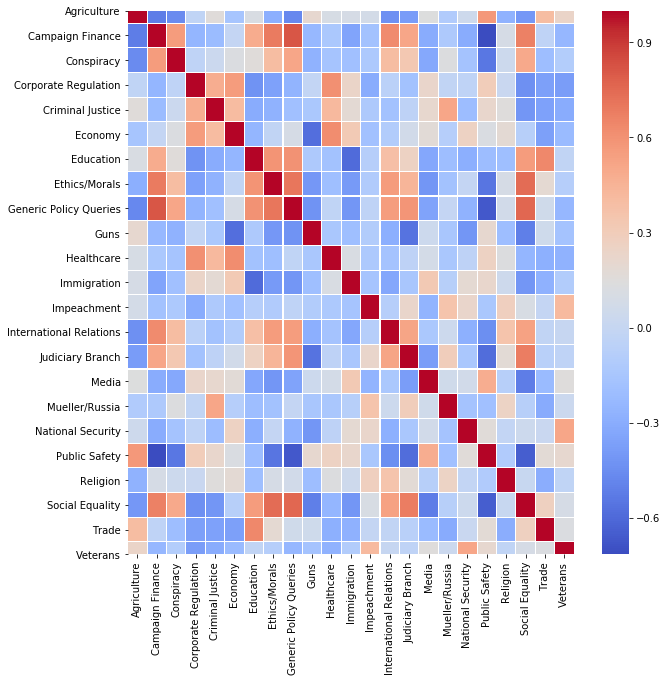

In [173]:
corrmat = Gardner_adj_final_7.drop(['const'], axis = 1).corr()
  
f, ax = plt.subplots(figsize =(10, 10)) 
sns.heatmap(corrmat, ax = ax, cmap ="coolwarm", linewidths = 0.1)

In [174]:
# Variance Inflation Factor of significant variables
pd.Series([variance_inflation_factor(Gardner_adj_final_7.values, i) 
               for i in range(Gardner_adj_final_7.shape[1])], 
              index=Gardner_adj_final_7.columns).sort_values()

Religion                        2.791264
Conspiracy                      2.938755
Impeachment                     2.971613
Media                           3.090640
Agriculture                     3.450056
Healthcare                      3.815647
Trade                           4.370020
Judiciary Branch                5.218305
Criminal Justice                5.380958
Veterans                        5.475778
Ethics/Morals                   5.714083
Corporate Regulation            5.830862
Campaign Finance                6.553485
Public Safety                   6.644761
International Relations         7.063768
Mueller/Russia                  9.313346
Generic Policy Queries         10.222195
Economy                        10.498353
National Security              10.759336
Education                      12.676342
Immigration                    15.178208
Social Equality                16.799286
Guns                           52.228498
const                      177538.004881
dtype: float64

In [175]:
Gardner_adj_final_7.describe()

,const,Agriculture,Campaign Finance,Conspiracy,Corporate Regulation,Criminal Justice,Economy,Education,Ethics/Morals,Generic Policy Queries,...,International Relations,Judiciary Branch,Media,Mueller/Russia,National Security,Public Safety,Religion,Social Equality,Trade,Veterans
count,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1.0,0.002648,0.001141,0.002050,0.007741,0.086322,0.184681,0.038590,0.043393,0.011994,...,0.019378,0.027261,0.040753,0.003987,0.114113,0.094727,0.006615,0.072994,0.004493,0.013894
std,0.0,0.000171,0.000109,0.000192,0.000363,0.002991,0.004386,0.003406,0.003590,0.001410,...,0.001652,0.002357,0.001447,0.004028,0.004483,0.004569,0.000354,0.003675,0.000805,0.003345
min,1.0,0.002359,0.000924,0.001758,0.006703,0.080807,0.171563,0.032818,0.034244,0.009009,...,0.016191,0.020557,0.038160,0.001239,0.103652,0.084172,0.006040,0.063577,0.003310,0.010876
25%,1.0,0.002509,0.001055,0.001941,0.007486,0.084235,0.182047,0.036212,0.040845,0.010812,...,0.018391,0.025880,0.039569,0.002151,0.110726,0.091263,0.006393,0.070243,0.004074,0.012700
50%,1.0,0.002653,0.001127,0.002021,0.007735,0.085953,0.185396,0.038859,0.044253,0.012125,...,0.019237,0.027778,0.040579,0.002924,0.113695,0.094813,0.006561,0.073362,0.004291,0.013159
75%,1.0,0.002737,0.001236,0.002098,0.007995,0.087606,0.187361,0.040539,0.045750,0.013206,...,0.019934,0.029091,0.041811,0.003662,0.116866,0.098176,0.006754,0.075858,0.004643,0.013876
max,1.0,0.003270,0.001343,0.003037,0.008524,0.096897,0.196639,0.050053,0.049691,0.014674,...,0.025213,0.032016,0.044219,0.023643,0.125682,0.103783,0.008050,0.080528,0.008077,0.032516


## time split testing data and training data R2

In [51]:
x_7.head()

,Crime,Educ,Environment,Ethics,Health_Econ,Immigration,Impeachment,Law_Govt,Media,Religion,ReprHealth,SocEq,Taxes,Trade_Agr,War
0,0.250748,0.036008,0.047425,0.039814,0.222469,0.019914,0.006282,0.095102,0.031629,0.005115,0.009124,0.069162,0.019282,0.005274,0.142653
1,0.250443,0.036615,0.047714,0.040417,0.225403,0.018888,0.006442,0.094677,0.031766,0.005041,0.009410,0.070674,0.018292,0.005294,0.138924
2,0.248615,0.037267,0.048566,0.040909,0.228535,0.017753,0.006864,0.092952,0.032266,0.005079,0.009937,0.072328,0.017799,0.005357,0.135773
3,0.246613,0.037700,0.048706,0.041497,0.229568,0.017039,0.006907,0.092782,0.032159,0.004975,0.010240,0.073146,0.017642,0.005549,0.135477
4,0.244920,0.038108,0.048181,0.041613,0.229556,0.016708,0.006964,0.094079,0.032347,0.004873,0.010465,0.073939,0.017533,0.005602,0.135113


In [52]:
Gardner_adj_final_6.describe()

,const,Crime,Educ,Health_Econ,Immigration,Impeachment,Law_Govt,Media,SocEq,Taxes
count,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1.0,0.263692,0.037835,0.228443,0.016953,0.006965,0.087984,0.032349,0.071906,0.011875
std,0.0,0.015272,0.003992,0.006125,0.004175,0.003392,0.009312,0.001141,0.002448,0.002084
min,1.0,0.241348,0.031589,0.211200,0.013241,0.004385,0.069377,0.029964,0.064544,0.008922
25%,1.0,0.255208,0.035110,0.225538,0.014795,0.005205,0.081315,0.031703,0.070421,0.010344
50%,1.0,0.259791,0.038509,0.229945,0.015406,0.006076,0.086948,0.032266,0.071792,0.011111
75%,1.0,0.268668,0.039697,0.232380,0.017099,0.006825,0.092866,0.033081,0.073681,0.013379
max,1.0,0.334618,0.054197,0.240291,0.035865,0.023241,0.117952,0.035162,0.077384,0.019282


In [53]:
x_train_Gardner_adj_final_6, x_test_Gardner_adj_final_6, y_train_Gardner_adj_final_6, y_test_Gardner_adj_final_6 = train_test_split(x_7, Gardner_adj_final_6, test_size=0.3, random_state=42)

In [54]:
x_test_Gardner_adj_final_6.describe()

,Crime,Educ,Environment,Ethics,Health_Econ,Immigration,Impeachment,Law_Govt,Media,Religion,ReprHealth,SocEq,Taxes,Trade_Agr,War
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.265612,0.037459,0.048915,0.037219,0.227688,0.016993,0.006962,0.087260,0.032378,0.005280,0.010265,0.071713,0.011522,0.005961,0.134772
std,0.018219,0.003605,0.003526,0.003434,0.006270,0.004385,0.003722,0.009253,0.001082,0.000306,0.001500,0.002707,0.001825,0.000695,0.007277
min,0.241348,0.031691,0.042111,0.029724,0.213895,0.013360,0.004412,0.071054,0.030240,0.004835,0.008296,0.065109,0.008922,0.005014,0.121453
25%,0.255733,0.034109,0.046889,0.034521,0.224119,0.014795,0.005098,0.081222,0.031897,0.005082,0.009434,0.069853,0.010283,0.005522,0.131188
50%,0.261145,0.038507,0.048018,0.037470,0.229416,0.015290,0.006016,0.086517,0.032301,0.005235,0.010062,0.071617,0.011005,0.005881,0.133752
75%,0.268773,0.039462,0.050951,0.039402,0.231678,0.017064,0.006900,0.091727,0.033035,0.005413,0.010487,0.073406,0.012781,0.006194,0.136109
max,0.329984,0.051522,0.057136,0.043408,0.238787,0.035504,0.022685,0.116185,0.034457,0.006483,0.017624,0.076317,0.017473,0.008950,0.158134


In [55]:
#Gardner_adj_final_6
reg_Gardner_adj_final_6 = LinearRegression().fit(x_train_Gardner_adj_final_6, y_train_Gardner_adj_final_6)
post_train_Gardner_adj_final_6 = reg_Gardner_adj_final_6.predict(x_train_Gardner_adj_final_6)
post_test_Gardner_adj_final_6 = reg_Gardner_adj_final_6.predict(x_test_Gardner_adj_final_6)
print('Gardner_adj_final_6:: Train:', round(r2_score(y_train_Gardner_adj_final_6,post_train_Gardner_adj_final_6),3),' Test:', round(r2_score(y_test_Gardner_adj_final_6,post_test_Gardner_adj_final_6),3))



Gardner_adj_final_6:: Train: 1.0  Test: 1.0


# ===================================

# ===================================

# Candidate Terms Attribution Models
#### Models using only the Termss that the candidates have used

In [56]:
#Read in attribution file
attribution = pd.read_excel(r'C:\Users\boai-\Desktop\UnumAI\Colorado analysis\2020 CO Attribution.xlsx')
attribution.head()

,Unnamed: 0,Cory Gardner,John Hickenlooper,Other Dems
0,farmers market,0,0,1
1,colorado land,1,0,0
2,land,20,5,9
3,lands,28,8,24
4,lands day,1,0,1


In [57]:
attribution['Terms'] = attribution['Unnamed: 0']

In [58]:
#join with original data
att_data = data.merge(attribution, on = 'Terms', how = 'inner')
att_data = att_data.fillna(0)
att_data.shape
#att_data.head()

(7799, 250)

In [59]:
att_data.head()

,Unnamed: 0_x,Term,Category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,...,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-12 00:00:00,2019-10-13 00:00:00,2019-10-14 00:00:00,2019-10-15 00:00:00,Unnamed: 0_y,Cory Gardner,John Hickenlooper,Other Dems
0,0,% of people,Electability,0.000000,0.000016,0.000000,0.000000,0.000010,0.000000,0.000000,...,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,% of people,0,1,0
1,1,1 diabetes,Healthcare,0.000014,0.000016,0.000019,0.000000,0.000000,0.000000,0.000011,...,0.000011,0.000021,0.000015,0.000018,0.000012,0.000010,1 diabetes,0,0,1
2,2,1 president,Electability,0.000031,0.000035,0.000075,0.000071,0.000041,0.000077,0.000029,...,0.000047,0.000055,0.000030,0.000040,0.000041,0.000028,1 president,0,0,1
3,3,10 women,Social Equality,0.000010,0.000000,0.000019,0.000012,0.000000,0.000011,0.000011,...,0.000011,0.000021,0.000000,0.000000,0.000012,0.000018,10 women,0,0,1
4,4,100 homes,Economy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100 homes,0,0,1


In [60]:
Hickenlooper_att = att_data[att_data['John Hickenlooper'] > 0]
Hickenlooper_att = Hickenlooper_att.drop(['Unnamed: 0_x','Unnamed: 0_y','Cory Gardner','Other Dems'],axis = 1)

In [61]:
Hickenlooper_att.head()

,Term,Category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,2019-02-22 00:00:00,...,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:00:00,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-12 00:00:00,2019-10-13 00:00:00,2019-10-14 00:00:00,2019-10-15 00:00:00,John Hickenlooper
0,% of people,Electability,0.000000,0.000016,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000,...,0.000000,0.000011,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,1
9,12 people,Public Safety,0.000007,0.000000,0.000034,0.000009,0.000007,0.000000,0.000008,0.000000,...,0.000009,0.000000,0.000008,0.000000,0.000000,0.000033,0.000000,0.000000,0.000007,2
23,2020 dem,Electability,0.000000,0.000000,0.000000,0.000000,0.000018,0.000011,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000,0.000009,1
24,2020 democrats,Electability,0.000019,0.000035,0.000051,0.000034,0.000078,0.000081,0.000034,0.000024,...,0.000018,0.000020,0.000018,0.000041,0.000029,0.000027,0.000000,0.000011,0.000012,1
25,2020 election,Electability,0.000035,0.000015,0.000030,0.000015,0.000060,0.000036,0.000026,0.000024,...,0.000044,0.000049,0.000028,0.000047,0.000059,0.000060,0.000035,0.000050,0.000043,2


In [62]:
H_group = Hickenlooper_att[['category', 'Terms']].groupby('category').count()
H_group.head()

,Term
Category,
Agriculture,24
Campaign Finance,19
Congress,70
Conspiracy,10
Corporate Regulation,20


In [63]:
H_group.shape

(33, 1)

In [64]:
Gardner_att = att_data[att_data['Cory Gardner'] > 0]
Gardner_att = Gardner_att.drop(['Unnamed: 0_x','Unnamed: 0_y','John Hickenlooper','Other Dems'],axis = 1)

In [65]:
Gardner_att.head()

,Term,Category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,2019-02-22 00:00:00,...,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:00:00,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-12 00:00:00,2019-10-13 00:00:00,2019-10-14 00:00:00,2019-10-15 00:00:00,Cory Gardner
5,100+ northern colorado veterans,Veterans,0.000433,0.000409,0.000438,0.000425,0.000552,0.000539,0.000568,0.000577,...,0.000457,0.000520,0.000418,0.000606,0.000446,0.000563,0.000508,0.000471,0.000600,1
7,115th congress,Congress,0.000008,0.000031,0.000011,0.000010,0.000023,0.000009,0.000000,0.000000,...,0.000009,0.000000,0.000008,0.000000,0.000009,0.000000,0.000000,0.000000,0.000016,1
8,116th congress,Congress,0.000035,0.000000,0.000000,0.000027,0.000014,0.000024,0.000023,0.000020,...,0.000034,0.000024,0.000008,0.000016,0.000009,0.000000,0.000013,0.000027,0.000022,2
13,19th amendment,Social Equality,0.000097,0.000045,0.000059,0.000098,0.000093,0.000101,0.000146,0.000148,...,0.000130,0.000139,0.000145,0.000148,0.000124,0.000070,0.000074,0.000149,0.000139,2
20,2018 farm,Agriculture,0.000000,0.000000,0.000019,0.000000,0.000010,0.000011,0.000000,0.000014,...,0.000000,0.000000,0.000010,0.000000,0.000012,0.000000,0.000000,0.000012,0.000010,1


In [66]:
G_group = Gardner_att[['category', 'Terms']].groupby('category').count()
G_group.head()

,Term
Category,
Agriculture,27
Campaign Finance,4
Congress,84
Conspiracy,9
Corporate Regulation,15


In [67]:
G_group.shape

(33, 1)

In [68]:
result = pd.merge(H_group, G_group, how='left', on=['category'])
result.columns = ['John Hicklooper','Cory Gardner']
result.head()

,John Hicklooper,Cory Gardner
Category,,
Agriculture,24,27
Campaign Finance,19,4
Congress,70,84
Conspiracy,10,9
Corporate Regulation,20,15


In [69]:
#result = result.reset_index()
#result = result.rename(columns = { 'index': "category"})
#result.head()

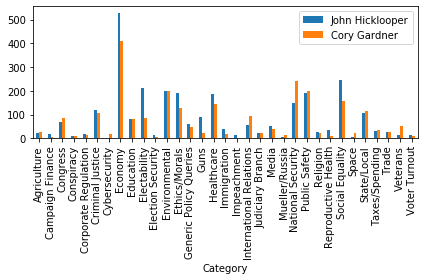

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


#df3=result[['Cory Gardner','John Hicklooper']].set_index('category')
#print(df3)
result.plot.bar()             # standard bar chart
plt.tight_layout()
plt.show()


In [71]:
reg_df_Gardner = pd.merge(Gardner_att,pca_cats,on='category',how='left').drop(["Terms"],axis = 1).groupby('Component').sum().T


In [72]:
reg_df_Gardner.head()

Component,Crime,Educ,Electability,Environment,Ethics,Health_Econ,Immigration,Impeachment,Law_Govt,Media,Religion,ReprHealth,SocEq,Taxes,Trade_Agr,War
2019-02-15 00:00:00,0.148527,0.018584,0.035798,0.024680,0.022863,0.117276,0.007708,0.002802,0.056532,0.014520,0.001035,0.001511,0.026968,0.019855,0.003619,0.116907
2019-02-16 00:00:00,0.159774,0.017217,0.035676,0.026883,0.022847,0.104259,0.008230,0.003098,0.062722,0.013245,0.001293,0.001894,0.025467,0.014493,0.003840,0.117086
2019-02-17 00:00:00,0.154844,0.017873,0.035791,0.028992,0.024000,0.107409,0.007653,0.003374,0.055604,0.016810,0.001458,0.002137,0.027708,0.012134,0.003574,0.102856
2019-02-18 00:00:00,0.151408,0.019916,0.036435,0.027780,0.025173,0.133160,0.005971,0.003052,0.048597,0.012986,0.001164,0.001937,0.028788,0.011299,0.003724,0.094210
2019-02-19 00:00:00,0.149143,0.022344,0.039508,0.026966,0.026282,0.126898,0.006010,0.003156,0.053818,0.013572,0.000942,0.001682,0.027925,0.009954,0.003785,0.091590


In [73]:
#reg_df_Gardner = reg_df_Gardner.drop('Unnamed: 0', axis = 0)
reg_df_Gardner = reg_df_Gardner.reset_index().rename(columns={'index':'Date'})
reg_df_Gardner['Date'] = pd.to_datetime(reg_df_Gardner['Date'], infer_datetime_format=True)
reg_df_Gardner = pd.merge(reg_df_Gardner,dependents,on='Date',how='inner')
reg_df_Gardner = reg_df_Gardner.fillna(0)
reg_df_Gardner.head()

ValueError: ('Unknown string format:', 'Cory Gardner')

In [ ]:
reg_df_Gardner = reg_df_Gardner.drop(['Date','Hickenlooper_raw','Hickenlooper_adj' ,'Gardner_raw','Gardner_adj','Electability'], axis = 1)


In [ ]:
reg_df_Gardner.head()

# =======================================

# Gardner - attribution model

## regression model for Terms Immpeachment 

In [ ]:
pca_cat = pd.read_excel('2020 Dems category Mapping.xlsx')
dependents = pd.read_excel('2020 Dependent.xlsx')

In [ ]:
data = pd.read_excel(r'C:\Users\boai-\Desktop\UnumAI\Colorado analysis\2020_CO_Termss_Law_Govt_cleaned.xlsx')

In [ ]:
dependents = dependents.rename(columns = {'Unnamed: 0':'Date'})

In [ ]:
dependents.shape

In [ ]:
dependents

In [ ]:
data.head()

In [ ]:
# importing pandas as pd 
import pandas as pd 
data = data.drop('Unnamed: 0',axis =1)
data = data.drop('category',axis =1)


In [ ]:
data = data.transpose()
new_header = data.iloc[0] #grab the first row for the header
data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header
data = data.reset_index()
data = data.rename(columns = { 'index': "Date"})
data.head()

In [ ]:
#data[212:]
data = data.drop(data.index[213:])


In [ ]:
all_df_list = [data, dependents]


In [ ]:
data.shape

In [ ]:
dependents.shape

In [ ]:
reg_df = pd.merge(data,dependents,on='Date',how='left')

In [ ]:
reg_df = reg_df.fillna(0)

In [ ]:
reg_df.head()

In [ ]:
# if not rolling data, rename this variable and replace throughout 
# x = reg_df.drop(...)
x_7 = reg_df.drop(columns={'Date','Hickenlooper_raw','Hickenlooper_adj' ,'Gardner_raw','Gardner_adj'}, axis = 1)

Hickenlooper_adj = reg_df['Hickenlooper_adj']
Gardner_adj = reg_df['Gardner_adj']



x_train_Hickenlooper_adj, x_test_Hickenlooper_adj, y_train_Hickenlooper_adj, y_test_Hickenlooper_adj = train_test_split(x_7, Hickenlooper_adj, test_size=0.3, random_state=42)
x_train_Gardner_adj, x_test_Gardner_adj, y_train_Gardner_adj, y_test_Gardner_adj = train_test_split(x_7, Gardner_adj, test_size=0.3, random_state=42)

In [ ]:
#Hickenlooper_adj
reg_Hickenlooper_adj = LinearRegression().fit(x_train_Hickenlooper_adj, y_train_Hickenlooper_adj)
pred_train_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_train_Hickenlooper_adj)
pred_test_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_test_Hickenlooper_adj)
print('Hickenlooper_adj:: Train:', round(r2_score(y_train_Hickenlooper_adj,pred_train_Hickenlooper_adj),3),' Test:', round(r2_score(y_test_Hickenlooper_adj,pred_test_Hickenlooper_adj),3))

#Gardner_adj
reg_Gardner_adj = LinearRegression().fit(x_train_Gardner_adj, y_train_Gardner_adj)
pred_train_Gardner_adj = reg_Gardner_adj.predict(x_train_Gardner_adj)
pred_test_Gardner_adj = reg_Gardner_adj.predict(x_test_Gardner_adj)
print('Gardner_adj:: Train:', round(r2_score(y_train_Gardner_adj,pred_train_Gardner_adj),3),' Test:', round(r2_score(y_test_Gardner_adj,pred_test_Gardner_adj),3))



In [ ]:
Hickenlooper_adj_train = roll_7['Hickenlooper_adj'][:200]
Gardner_adj_train = roll_7['Gardner_adj'][:200]

Hickenlooper_adj_test = roll_7['Hickenlooper_adj'][200:]
Gardner_adj_test = roll_7['Gardner_adj'][200:]

x_7_train = x_7[:200]
x_7_test = x_7[200:]

In [ ]:
x_7_test.describe()

In [ ]:
Gardner_adj_baseline = sm.add_constant(x_7)
mod = sm.OLS(Gardner_adj, Gardner_adj_baseline)
res = mod.fit()
print(res.summary())
# This is the baseline model with all variables